In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv('Dataset/Train.csv')

In [3]:
train_data.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,CR_102659,04-JUL-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0
1,CR_189752,18-JUL-17,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1
2,CR_184637,15-MAR-17,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1
3,CR_139071,13-FEB-09,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1
4,CR_109335,13-APR-05,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1


In [4]:
train_data.shape

(23856, 18)

In [5]:
y_train = train_data['MULTIPLE_OFFENSE']

x_train = train_data.drop(['MULTIPLE_OFFENSE'],axis=1)

In [6]:
print(x_train.shape,y_train.shape)

(23856, 17) (23856,)


In [7]:
x_train.describe()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
count,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23674.000000,23856.000000,23856.000000,23856.000000
mean,0.483778,24.791206,24.637450,4.276744,2.455609,6.154175,4.876509,0.972460,4.924128,1.244802,206.954519,0.974064,85.237383,72.674296,33.464747
std,1.439738,15.240231,15.135093,2.944672,1.963095,4.471756,3.881931,1.453144,1.362625,1.119301,93.033348,1.167725,27.597226,43.297320,8.386834
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7.000000,8.000000,2.000000,1.000000,3.000000,2.000000,0.000000,5.000000,1.000000,174.000000,1.000000,72.000000,29.000000,34.000000
50%,0.000000,24.000000,24.000000,4.000000,3.000000,5.000000,4.000000,1.000000,5.000000,1.000000,249.000000,1.000000,98.000000,62.000000,34.000000
75%,0.000000,36.000000,35.000000,6.000000,5.000000,8.000000,7.000000,1.000000,6.000000,1.000000,249.000000,1.000000,103.000000,107.000000,34.000000
max,7.000000,52.000000,52.000000,10.000000,5.000000,19.000000,18.000000,99.000000,6.000000,90.000000,332.000000,90.000000,116.000000,142.000000,50.000000


In [8]:
x_train = x_train.drop(['INCIDENT_ID', 'DATE'],axis=1)

In [9]:
x_train.shape

(23856, 15)

In [10]:
x_train.isnull().sum()

X_1       0
X_2       0
X_3       0
X_4       0
X_5       0
X_6       0
X_7       0
X_8       0
X_9       0
X_10      0
X_11      0
X_12    182
X_13      0
X_14      0
X_15      0
dtype: int64

In [11]:
x_train['X_12'] = x_train['X_12'].fillna(x_train['X_12'].mode()[0])

## Modelling

### splitting the data into train and cross validation

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(x_train, y_train, test_size=0.33, random_state=42)

In [13]:
print(x_train.shape, y_train.shape)
print(x_cv.shape, y_cv.shape)

(15983, 15) (15983,)
(7873, 15) (7873,)


In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from tqdm import tqdm
from sklearn.metrics import recall_score

depth = [1,3,5,7,9,11,13,15,17,19,21,23,15]
cv_scores= []

for ele in tqdm(depth):
        
    clf = DecisionTreeClassifier(max_depth = ele)
    clf.fit(x_train,y_train)

    y_train_pred = clf.predict(x_train)
    y_cv_pred = clf.predict(x_cv)
       
    cv_scores.append(recall_score(y_cv,y_cv_pred))

100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 35.67it/s]


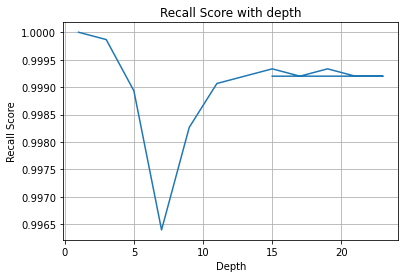

In [20]:
plt.plot(depth, cv_scores)
plt.xlabel('Depth')
plt.ylabel('Recall Score')
plt.title('Recall Score with depth')
plt.grid()
plt.show()

## Testing

In [21]:
test_data = pd.read_csv('Dataset/Test.csv')

In [22]:
test_data.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
0,CR_195453,01-FEB-18,0,30,35,7,3,6,4,0,5,1,174,NaN,72,119,23
1,CR_103520,05-MAR-04,0,44,44,1,3,7,1,4,6,1,316,0.0,12,29,34
2,CR_196089,27-JAN-18,0,34,33,3,5,2,7,3,0,1,316,1.0,72,0,34
3,CR_112195,18-AUG-06,7,3,2,3,5,9,8,0,5,1,174,1.0,112,87,34
4,CR_149832,31-OCT-11,0,7,8,7,3,2,7,1,5,1,174,0.0,112,93,43


In [23]:
test_data = test_data.drop(['INCIDENT_ID','DATE'],axis=1)

In [24]:
test_data.head()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
0,0,30,35,7,3,6,4,0,5,1,174,NaN,72,119,23
1,0,44,44,1,3,7,1,4,6,1,316,0.0,12,29,34
2,0,34,33,3,5,2,7,3,0,1,316,1.0,72,0,34
3,7,3,2,3,5,9,8,0,5,1,174,1.0,112,87,34
4,0,7,8,7,3,2,7,1,5,1,174,0.0,112,93,43


### checking for the null value

In [25]:
test_data.isnull().sum()

X_1       0
X_2       0
X_3       0
X_4       0
X_5       0
X_6       0
X_7       0
X_8       0
X_9       0
X_10      0
X_11      0
X_12    127
X_13      0
X_14      0
X_15      0
dtype: int64

### replacing null value with 1.0 

In [26]:
test_data['X_12'] = test_data['X_12'].fillna(test_data['X_12'].mode()[0])

### Applying the best classifier

In [27]:
clf = DecisionTreeClassifier(max_depth = 15)

clf.fit(x_train,y_train)

y_test_pred = clf.predict(test_data)

In [28]:
new_test = pd.read_csv('Dataset/Test.csv')

In [29]:
submission = pd.DataFrame({
        "INCIDENT_ID": new_test["INCIDENT_ID"],
        "MULTIPLE_OFFENSE": y_test_pred
    })

submission.to_csv('submission.csv', index=False)